In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comment=pd.read_csv("C:/Users/kumar/Desktop/Data_Science_files/GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comment.tail()

video_id                     comment_text  likes  replies
718447  lLN1FwiqGwc          MEME ME MEME ME MEME ME      0        0
718448  lLN1FwiqGwc  Yeah, but does everybody float?      0        0
718449  lLN1FwiqGwc              That meme me dace 😂      0        0
718450  lLN1FwiqGwc   10:43 Is that Miles Upshur????      2        0
718451  lLN1FwiqGwc              WA-HA\nWA-HA\nWA-HA      1        0

In [7]:
pip install textblob

In [4]:
from textblob import TextBlob

In [5]:
TextBlob("MEME ME MEME ME MEME ME").sentiment.polarity

0.0

In [6]:
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
comment.dropna(inplace=True)

comment

In [8]:
comment

video_id                                       comment_text  likes  \
0       jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1       jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2       jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3       jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
...             ...                                                ...    ...   
718447  lLN1FwiqGwc                            MEME ME MEME ME MEME ME      0   
718448  lLN1FwiqGwc                    Yeah, but does everybody float?      0   
718449  lLN1FwiqGwc                                That meme me dace 😂      0   
718450  lLN1FwiqGwc                     10:43 Is that Miles Upshur????      2   
718451  lLN1FwiqGwc                                WA-HA\nWA-HA\nWA-HA      1   

        replies  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
718447        0  
718448        0  
718449        0  
718450        0  
718451        0  

[718424 rows x 4 columns]

In [19]:
polarity=[]
for i in comment['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)


In [20]:
comment['polarity']=polarity

In [21]:
comment

video_id                                       comment_text  likes  \
0       jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1       jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2       jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3       jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
...             ...                                                ...    ...   
718447  lLN1FwiqGwc                            MEME ME MEME ME MEME ME      0   
718448  lLN1FwiqGwc                    Yeah, but does everybody float?      0   
718449  lLN1FwiqGwc                                That meme me dace 😂      0   
718450  lLN1FwiqGwc                     10:43 Is that Miles Upshur????      2   
718451  lLN1FwiqGwc                                WA-HA\nWA-HA\nWA-HA      1   

        replies  polarity  
0             0      0.45  
1             0      0.00  
2             0      0.00  
3             0      0.00  
4             0      1.00  
...         ...       ...  
718447        0      0.00  
718448        0      0.00  
718449        0      0.00  
718450        0      0.00  
718451        0      0.00  

[718424 rows x 5 columns]

## Wordcloud

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
comment_positive=comment[comment['polarity']==1]
comment_positive

video_id                                       comment_text  likes  \
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26      jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80      jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158     YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175     YPVcg45W0z4                        Welcome to the Scandiworld!      0   
...             ...                                                ...    ...   
718390  lLN1FwiqGwc  I'm just stopping the video three minutes in t...      0   
718416  lLN1FwiqGwc  Beating up tommy wiseu was the best part of th...      0   
718432  lLN1FwiqGwc                         kudos for the mtg cards :D      0   
718440  lLN1FwiqGwc                   Tommy Wiseau is my greatest fear      0   
718443  lLN1FwiqGwc                                           The best      0   

        replies  polarity  
4             0       1.0  
26            2       1.0  
80            1       1.0  
158           0       1.0  
175           0       1.0  
...         ...       ...  
718390        0       1.0  
718416        0       1.0  
718432        0       1.0  
718440        0       1.0  
718443        0       1.0  

[20400 rows x 5 columns]

In [23]:
from wordcloud import WordCloud,STOPWORDS

In [24]:
stopwords=set(STOPWORDS)

In [25]:
total_comment=" ".join(comment_positive['comment_text'])

In [26]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

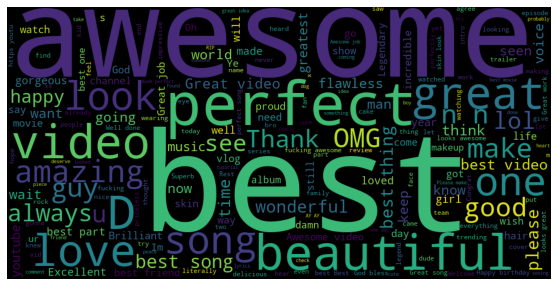

In [27]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')


In [28]:
comment_nagative=comment[comment['polarity']==-1]
comment_nagative

video_id                                       comment_text  likes  \
1387    ql0Op1VcELw                                             boring      0   
1394    ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530    -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745    F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793    F2uJvwiSZAQ                                      Thats insane.      0   
...             ...                                                ...    ...   
717296  t8sgy0faXyg                                           Terrible      0   
717668  LunHybOKIjU                     this is terrible em you are 50      0   
717716  AUP3uhrM19c                  Not a penalty terrible decision!!      0   
717903  8pHPohFezIk                                Hazard was terrible      0   
718356  lLN1FwiqGwc         You are nuts. The leper looked terrifying.      0   

        replies  polarity  
1387          0      -1.0  
1394          1      -1.0  
1530          0      -1.0  
1745          0      -1.0  
1793          0      -1.0  
...         ...       ...  
717296        0      -1.0  
717668        0      -1.0  
717716        0      -1.0  
717903        0      -1.0  
718356        0      -1.0  

[3339 rows x 5 columns]

In [29]:
total_comment1=" ".join(comment_nagative['comment_text'])

In [30]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comment1)

(-0.5, 999.5, 499.5, -0.5)

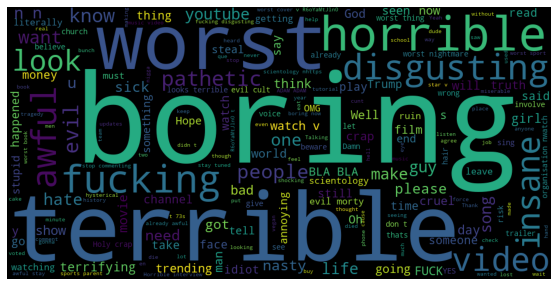

In [31]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analysing Tag columns

In [32]:
videos=pd.read_csv("C:/Users/kumar/Desktop/Data_Science_files/USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [33]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [34]:
tags_complete=" ".join(videos['tags'])

In [35]:
import re

In [36]:
tags=re.sub('[^a-zA-Z]'," ",tags_complete)

In [37]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [38]:
re.sub(' +'," ",tags_complete)

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [39]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

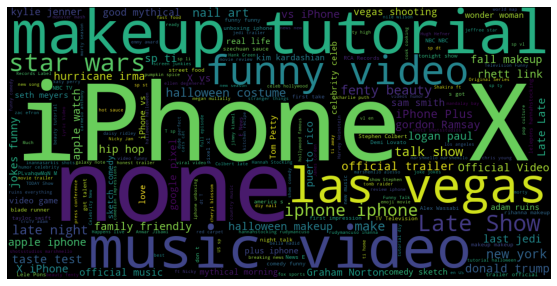

In [40]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# analysing like, dislike and views and relation between them

Text(0.5, 1.0, 'regression relation between views and dislikes')

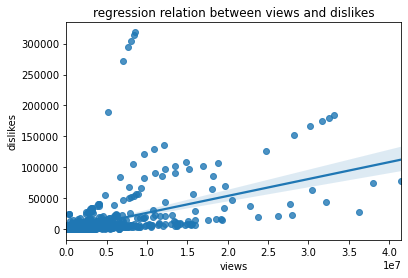

In [41]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('regression relation between views and dislikes')

Text(0.5, 1.0, 'regression relation between views and likes ')

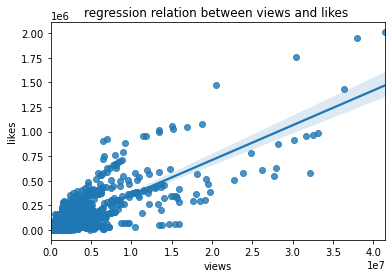

In [42]:
sns.regplot(data=videos,x="views",y='likes')
plt.title("regression relation between views and likes ")

In [43]:
df_corr=videos[['views','likes','dislikes']]
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

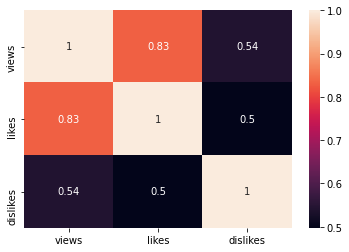

In [44]:
sns.heatmap(df_corr.corr(),annot=True)

# Analysing emojis in comment

In [52]:
pip install emoji

  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169298 sha256=802c795a1100a5295fafbbfd648feee42695bc68b79b7aed48d5280b0da14022
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\04\29\50\1e7189f03d2cf139e469863d54a1d3eabeb10c92c84e51f8a1
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [45]:
import emoji

In [46]:
comment1=comment['comment_text'][1]

In [47]:
[c for c in comment1 if c in emoji.UNICODE_EMOJI_ENGLISH]

['😂', '😂', '😂']

In [51]:
str=''
for i in comment['comment_text']:
   list = [c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]
   for ele in list:
        str=str+ele
    

In [52]:
len(str)

333278

In [53]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [54]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [55]:
result

{'🚦': 6,
 '👬': 47,
 '🕗': 7,
 '🗑': 15,
 '🌇': 11,
 '🗜': 5,
 '↪': 5,
 '🥝': 4,
 '🚹': 6,
 '㊙': 5,
 '🕉': 10,
 '🔎': 7,
 '🤔': 1734,
 '🐒': 43,
 '🗺': 14,
 '🚱': 7,
 '🕐': 7,
 '😔': 662,
 '🕤': 7,
 '♓': 9,
 '📀': 62,
 '🤜': 17,
 '🏨': 9,
 '🐣': 98,
 '⛰': 9,
 '🧣': 1,
 '🔮': 52,
 '➿': 5,
 '🐜': 55,
 '🌓': 15,
 '🆔': 5,
 '🍉': 109,
 '🗒': 5,
 '⛲': 11,
 '🎦': 21,
 '💶': 64,
 '⛑': 22,
 '⚪': 56,
 '👝': 14,
 '🚼': 17,
 '😗': 304,
 '⚕': 16,
 '✨': 1298,
 '🍨': 20,
 '🦅': 19,
 '✴': 30,
 '🕒': 7,
 '💌': 26,
 '📁': 61,
 '☃': 12,
 '😟': 147,
 '🌵': 42,
 '🧀': 446,
 '🤤': 446,
 '🧖': 5,
 '↙': 9,
 '🎆': 162,
 '⛏': 5,
 '🍚': 17,
 '🐍': 175,
 '🔈': 7,
 '📼': 11,
 '🔫': 209,
 '🚗': 27,
 '🍏': 20,
 '📓': 21,
 '🈸': 16,
 '🕰': 6,
 '☣': 19,
 '🎋': 8,
 '🐨': 39,
 '🤢': 301,
 '🖊': 5,
 '🚡': 12,
 '📑': 8,
 '👴': 40,
 '📗': 9,
 '🍈': 15,
 '🚙': 9,
 '🎁': 106,
 '🤰': 7,
 '🏳': 92,
 '🏯': 7,
 '🐚': 20,
 '👯': 40,
 '🤑': 157,
 '🎇': 149,
 '🍵': 23,
 '🍗': 630,
 '🔗': 7,
 '⚖': 12,
 '🤥': 21,
 '📱': 226,
 '🦎': 8,
 '❇': 11,
 '🈵': 5,
 '♨': 23,
 '💅': 166,
 '🍠': 16,
 '⛔': 14,
 '👺': 52,
 '🕜'

In [57]:
final={}
for key,value in sorted(result.items(),key=lambda item:item[1]):
    final[key]=value

In [58]:
final

{'🧣': 1,
 '🦏': 1,
 '🦓': 1,
 '🛷': 1,
 '🤺': 1,
 '🤽': 1,
 '🛒': 1,
 '🥚': 1,
 '🤟': 1,
 '🥜': 1,
 '🥡': 1,
 '🥨': 1,
 '🤾': 1,
 '🥌': 1,
 '🤹': 1,
 '🧠': 1,
 '🧤': 1,
 '🥟': 1,
 '🧡': 2,
 '🎌': 2,
 '🦖': 2,
 '🧘': 2,
 '🥅': 2,
 '🧛': 2,
 '🤱': 2,
 '🧒': 2,
 '🧢': 2,
 '🦕': 2,
 '🦔': 2,
 '🧝': 2,
 '🤯': 3,
 '🤨': 3,
 '🥖': 3,
 '🤫': 3,
 '🥄': 3,
 '🧐': 3,
 '🥝': 4,
 '🖇': 4,
 '⏯': 4,
 '♟': 4,
 '🦍': 4,
 '🗄': 4,
 '🧟': 4,
 '🥈': 4,
 '☸': 4,
 '⚗': 4,
 '🗓': 4,
 '🥞': 4,
 '⏸': 4,
 '🏌': 4,
 '🏷': 4,
 '⚙': 4,
 '⏹': 4,
 '🗂': 4,
 '☦': 4,
 '♾': 4,
 '⚧': 4,
 '💹': 4,
 '⏲': 4,
 '🤬': 4,
 '🛣': 4,
 '⏏': 4,
 '🦐': 4,
 '🦆': 4,
 '🖍': 4,
 '🛢': 4,
 '🤵': 4,
 '🛬': 4,
 '🗜': 5,
 '↪': 5,
 '㊙': 5,
 '➿': 5,
 '🆔': 5,
 '🗒': 5,
 '🧖': 5,
 '⛏': 5,
 '🖊': 5,
 '🈵': 5,
 '🚛': 5,
 '🗳': 5,
 '🎐': 5,
 '🔡': 5,
 '🚎': 5,
 '🔳': 5,
 '◻': 5,
 '🔄': 5,
 '🔃': 5,
 '🚉': 5,
 '🥉': 5,
 '🔼': 5,
 '🛂': 5,
 'Ⓜ': 5,
 '❎': 5,
 '🛥': 5,
 '🔣': 5,
 '🈳': 5,
 '🕎': 5,
 '🚠': 5,
 '🈁': 5,
 '🏮': 5,
 '☂': 5,
 '🌫': 5,
 '⛴': 5,
 '🗃': 5,
 '⛱': 5,
 '🗞': 5,
 '🈹': 5,
 '🥛': 5,
 '🤮': 5,
 '🖨': 5,
 '♦': 5,
 

In [60]:
keys=[*final.keys()]

In [62]:
values=[*final.values()]

In [65]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20: ]})
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [66]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [67]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [69]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)
iplot([trace])